In [1]:
import pickle
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('../../../src')
import raybay

In [2]:
# Load treatment plan results
result = np.load('result', allow_pickle=True)

In [3]:
# Reload goal and function dataframes (doesn't save correctly from remote)
result.goal_df = pd.read_csv('../goals.csv') 
result.func_df = pd.read_csv('funcs.csv')
pickle.dump(result, open('result', 'wb'))

In [4]:
# Clinical goals
result.goal_df

,Roi,Type,GoalCriteria,AcceptanceLevel,ParameterValue,Notes
0,BrachialPlexus,MaxDvh,AtMost,2360,60.24,NaN
1,BrachialPlexus,MaxDose,AtMost,2720,NaN,NaN
2,BronchialTree,MaxDvh,AtMost,1560,20.26,NaN
3,BronchialTree,MaxDose,AtMost,3480,NaN,NaN
4,ChestWall,MaxDvh,AtMost,3000,1.94,NaN
5,D2cm,MaxDose,AtMost,3000,NaN,NaN
6,Esophagus,MaxDvh,AtMost,1880,19.97,NaN
7,Esophagus,MaxDose,AtMost,2500,NaN,NaN
8,GreatVessels,MaxDvh,AtMost,4300,8.74,NaN
9,GreatVessels,MaxDose,AtMost,4900,NaN,NaN


In [5]:
# Constituent functions
result.func_df

,Roi,FunctionType,DoseLevel,PercentVolume,EudParameterA,Weight
0,PTV,MinDose,4800,0,NaN,1
1,BrachialPlexus,MaxDose,2710,0,NaN,10
2,Esophagus,MaxDose,2500,0,NaN,10
3,Ribs,MaxDose,4000,0,NaN,1
4,SpinalCanal,MaxDose,2080,0,NaN,10
5,Trachea,MaxDose,3480,0,NaN,10
6,Trachea,MaxDvh,1540,12,NaN,10
7,SpinalCanal,MaxDvh,2070,0,NaN,10


In [6]:
# Clinical goal results
compare = pd.DataFrame()
for index, row in result.goal_df.iterrows():
    roi = row['Roi']
    goal_type = row['Type']
    level = row['AcceptanceLevel']
    value = result.goal_dict[index][0]
    percent = 100*(value - level)/level
    compare = compare.append({'Roi': roi, 'Type': goal_type, 'AcceptanceLevel': level, 
                              'GoalValue': value, 'PercentChange': percent}, ignore_index=True)
compare = compare[['Roi', 'Type', 'AcceptanceLevel', 'GoalValue', 'PercentChange']] # enforce column order
compare

,Roi,Type,AcceptanceLevel,GoalValue,PercentChange
0,BrachialPlexus,MaxDvh,2360.0,1595.353195,-32.400288
1,BrachialPlexus,MaxDose,2720.0,3167.583496,16.455276
2,BronchialTree,MaxDvh,1560.0,185.645337,-88.099658
3,BronchialTree,MaxDose,3480.0,1363.467773,-60.819892
4,ChestWall,MaxDvh,3000.0,2480.391779,-17.320274
5,D2cm,MaxDose,3000.0,2755.746094,-8.141797
6,Esophagus,MaxDvh,1880.0,528.204296,-71.904027
7,Esophagus,MaxDose,2500.0,2741.433350,9.657334
8,GreatVessels,MaxDvh,4300.0,445.660565,-89.635801
9,GreatVessels,MaxDose,4900.0,1398.187256,-71.465566


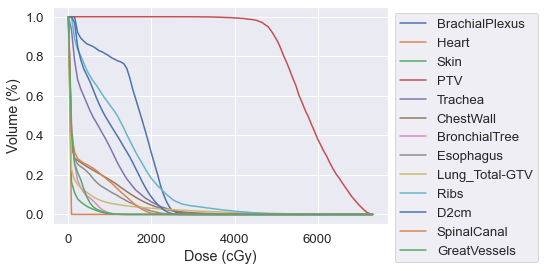

In [7]:
# Dose-volume histograms
result.dvhplot()

In [8]:
# Utility function values
lin = result.get_utility('linear')[0]
lin_quad = result.get_utility('linear_quadratic')[0]
print(f"Linear: {lin:.2f}, Linear-Quadratic: {lin_quad:.2f}")

Linear: 819.30, Linear-Quadratic: -2252.64
